In [33]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")


In [28]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [34]:
inp0 = pd.read_csv("Iris.csv")

In [5]:
inp0

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
inp0.shape

(150, 6)

In [7]:
inp0.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
inp0.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
inp0.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
inp0.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [35]:
inp0.drop(['Id'] , axis = 1 , inplace = True)

In [13]:
inp0.duplicated().sum()

3

In [37]:
inp0.drop_duplicates(inplace=True)

In [38]:
inp0.duplicated().sum()

0

In [39]:
inp0

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


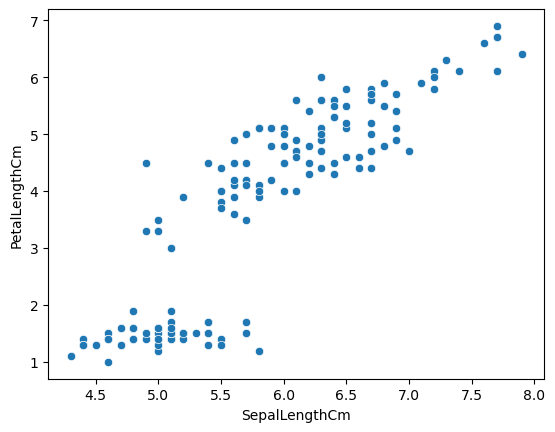

In [17]:
sns.scatterplot(data=inp0,x="SepalLengthCm" ,y="PetalLengthCm")
plt.show()

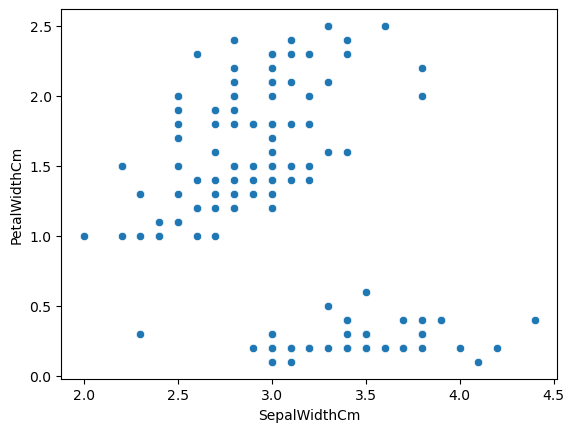

In [18]:
sns.scatterplot(data=inp0,x="SepalWidthCm" ,y="PetalWidthCm")
plt.show()

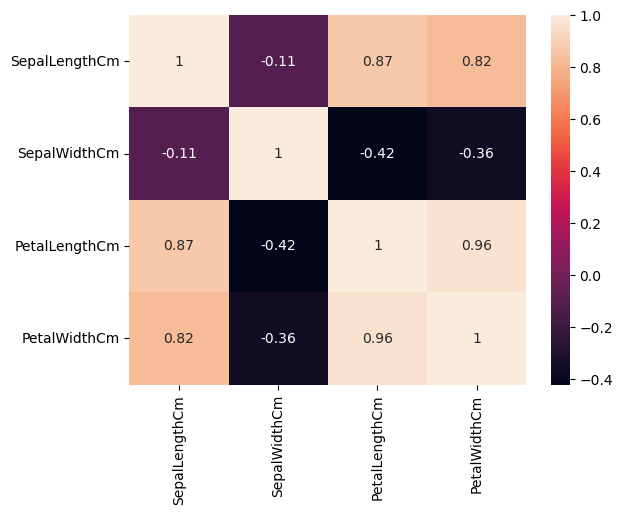

In [19]:
sns.heatmap(inp0.corr() , annot=True)
plt.show()

In [20]:
scup =[]

for i in range(1,11):
    Kmeans=KMeans(n_clusters=i ,random_state=40, max_iter = 300 , n_init = 10 )
    Kmeans.fit(inp0.values)
    scup.append(Kmeans.inertia_)

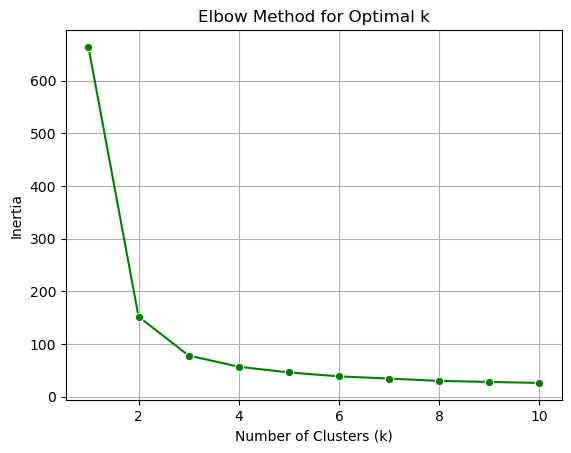

In [21]:
sns.lineplot(x= range(1,11), y=scup, marker='o', linestyle='-', color='g')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [25]:
Kmeans=KMeans(n_clusters=3 ,random_state=0, max_iter = 300 , n_init = 10 )

In [29]:
y_kmeans = Kmeans.fit_predict(inp0.values)

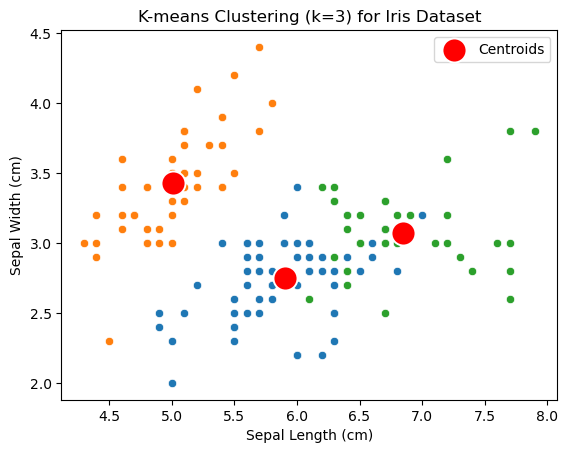

In [31]:
sns.scatterplot(x = inp0.values[y_kmeans == 0, 0] , y = inp0.values[y_kmeans == 0, 1],markers = '-')
sns.scatterplot(x = inp0.values[y_kmeans == 1, 0] , y = inp0.values[y_kmeans == 1, 1])
sns.scatterplot(x = inp0.values[y_kmeans == 2, 0] , y = inp0.values[y_kmeans == 2, 1])
sns.scatterplot(x = Kmeans.cluster_centers_[:, 0] , y = Kmeans.cluster_centers_[:,1],label='Centroids' ,c="red",s=300)
plt.title('K-means Clustering (k=3) for Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()
     

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [49]:
X = inp0.drop("Species",axis=1)
y = inp0.Species

In [50]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [51]:
from sklearn.neighbors import KNeighborsClassifier


In [52]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [53]:
y_pred = knn.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 15  1]
 [ 0  1 12]]


In [57]:
from sklearn.metrics import accuracy_score
print("accuracy is" ,accuracy_score(y_pred,y_test))

accuracy is 0.9555555555555556
